In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve





In [81]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [82]:
df.describe().shape

(8, 4)

In [83]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [84]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
#le.fit(df.region.drop_duplicates()) 
#df.region = le.transform(df.region)

<Figure size 864x360 with 0 Axes>

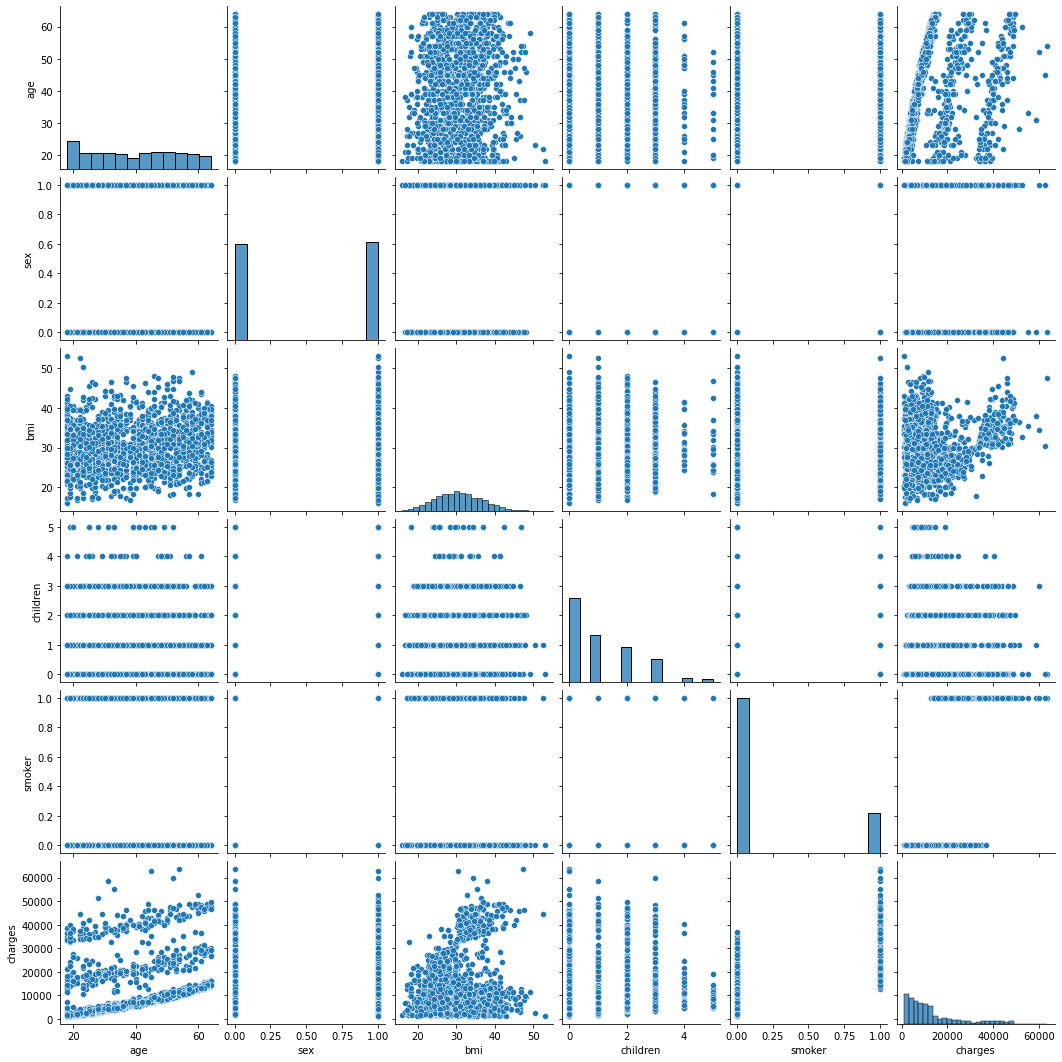

In [85]:
f= plt.figure(figsize=(12,5))


sns.pairplot(df)

In [86]:
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
Name: charges, dtype: float64

(6.5, -0.5)

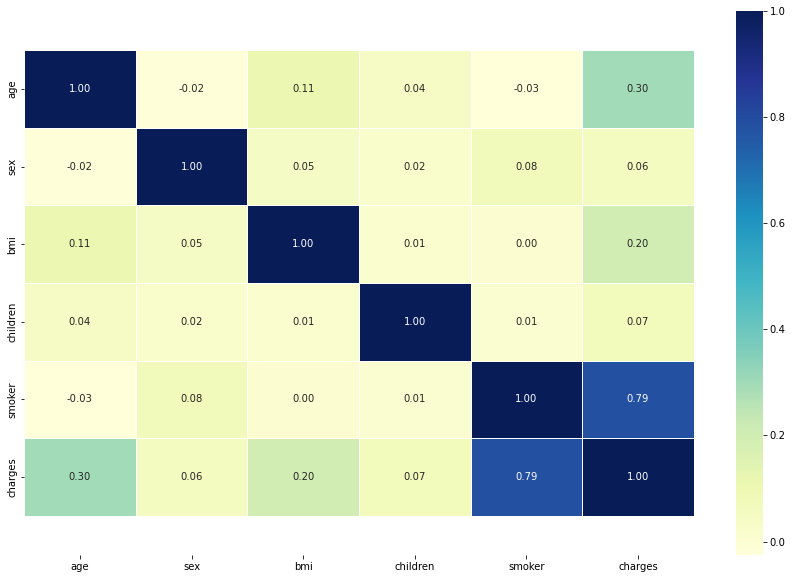

In [87]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

30.663396860986538


c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

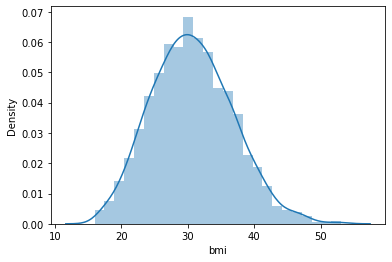

In [88]:
#sns.countplot(x="bmi", data=df)
print(df.bmi.mean())
sns.distplot(df['bmi'])


<AxesSubplot:title={'center':'Box plot for charges of smoker and non smoker '}, xlabel='charges', ylabel='smoker'>

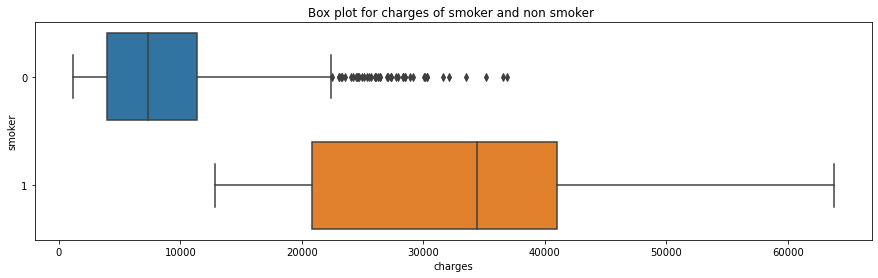

In [89]:
# relationship between smoker and charges 
# // we tend to see that smokers obviously have higher charges than non smokers 
plt.figure(figsize=(15,4))
plt.title("Box plot for charges of smoker and non smoker ")
sns.boxplot(y="smoker", x="charges", data = df , orient="h")

<AxesSubplot:xlabel='region', ylabel='count'>

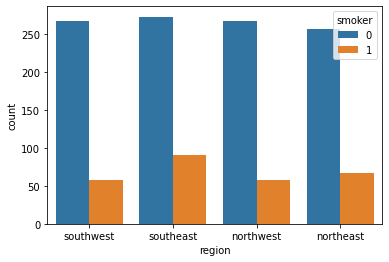

In [90]:
# relationship between smoker and region 
sns.countplot(data=df , x=df.region , hue=df.smoker )

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of bmi for women')

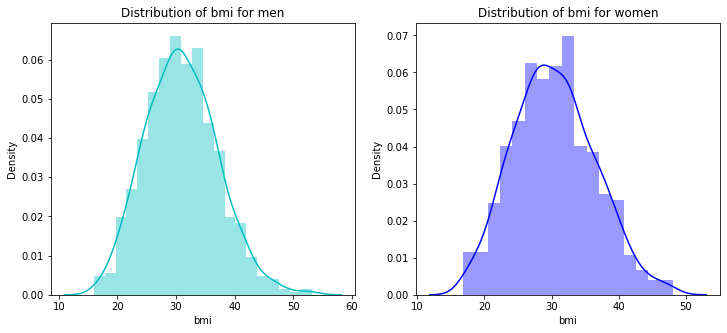

In [91]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.sex == 1)]["bmi"],color='c',ax=ax)
ax.set_title('Distribution of bmi for men')

ax=f.add_subplot(122)
sns.distplot(df[(df.sex == 0)]['bmi'],color='b',ax=ax)
ax.set_title('Distribution of bmi for women')

<AxesSubplot:title={'center':'Box plot for bmi of male vs female '}, xlabel='bmi', ylabel='sex'>

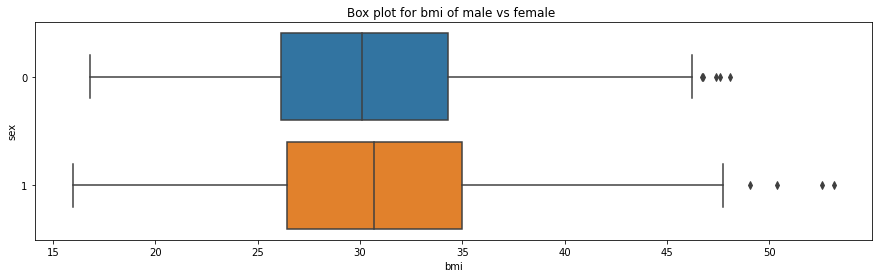

In [92]:
plt.figure(figsize=(15,4))
plt.title("Box plot for bmi of male vs female ")
sns.boxplot(y="sex", x="bmi", data = df , orient="h")

<AxesSubplot:xlabel='region'>

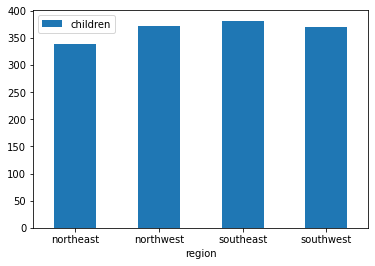

In [93]:
df2 = df.groupby('region')['children'].sum()
df2 = df2.reset_index()
df2.plot.bar(x='region' , y='children' , rot=0)

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

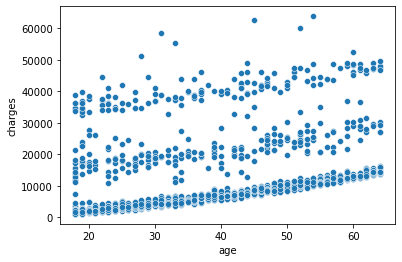

In [94]:
sns.scatterplot(df.age , df.charges)

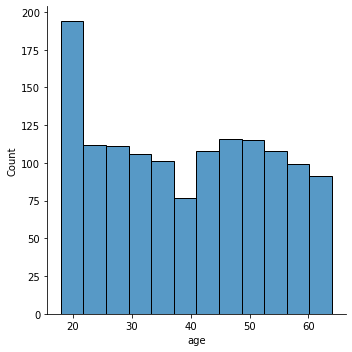

In [95]:
sns.displot(df.age)

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


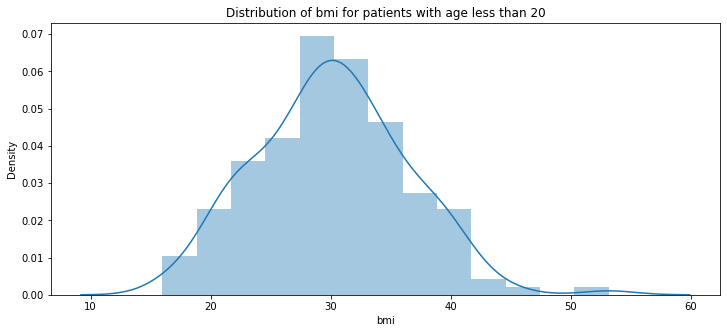

In [96]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi for patients with age less than 20")
ax = sns.distplot(df[(df.age <= 20)]['bmi'])

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


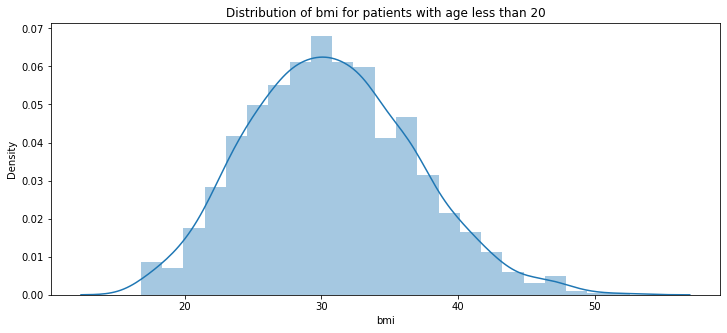

In [97]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi for patients with age less than 20")
ax = sns.distplot(df[(df.age >= 20)]['bmi'])

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='children', ylabel='bmi'>

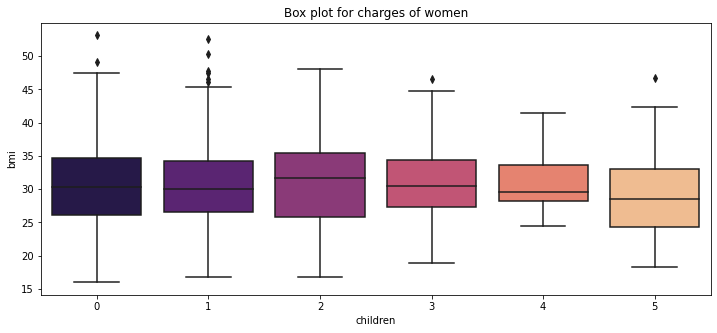

In [98]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(x="children", y="bmi", data = df , palette = 'magma')

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


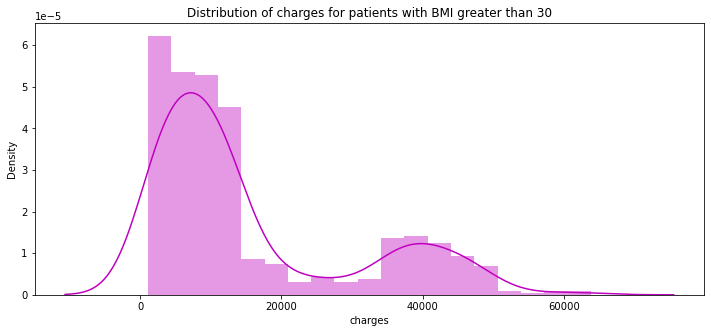

In [99]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


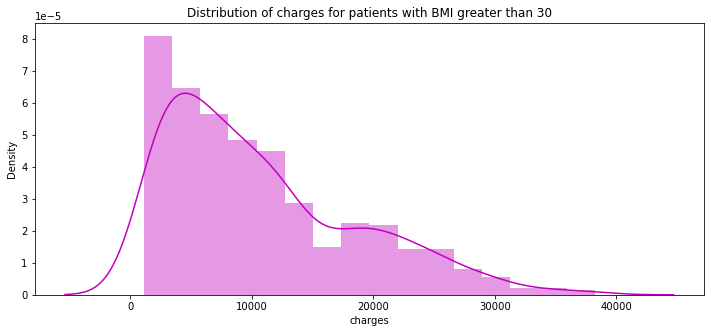

In [100]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi <= 30)]['charges'], color = 'm')

In [138]:
df



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [184]:
x = df.drop('charges' , axis=1)
y = df['charges']


In [185]:
dummies =  pd.get_dummies(df['region'])
x = x.drop('region' ,axis=1) 
x = x.join(dummies)
x

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [157]:
x['age'].dtype

dtype('int64')

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age' , 'bmi']

sc = StandardScaler()
x[cols_to_scale] = sc.fit_transform(x[cols_to_scale])
x


,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,-1.438764,0,-0.453320,0,1,0,0,0,1
1,-1.509965,1,0.509621,1,0,0,0,1,0
2,-0.797954,1,0.383307,3,0,0,0,1,0
3,-0.441948,1,-1.305531,0,0,0,1,0,0
4,-0.513149,1,-0.292556,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,0,1,0,0
1334,-1.509965,0,0.206139,0,0,1,0,0,0
1335,-1.509965,0,1.014878,0,0,0,0,1,0
1336,-1.296362,0,-0.797813,0,0,0,0,0,1


In [188]:
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)
print(lr.score(x_test,y_test))


0.7958786376014413


In [201]:
y_pred = lr.predict(x_test)
import sklearn.metrics as metrics

MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 4012.7152768530855
mean squared error: 32135747.239381798


In [190]:
from sklearn.preprocessing import PolynomialFeatures

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8842067022054053


In [200]:
y_pred = plr.predict(X_test)
import sklearn.metrics as metrics

MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 2884.1570348626865
mean squared error: 18229861.422715224


In [191]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)
regressor.score(x_test , y_test)

DecisionTreeRegressor(random_state=0)

In [196]:
y_pred = regressor.predict(x_test)

In [198]:
import sklearn.metrics as metrics

MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)
print("mean absolute error:",MAE)
print("mean squared error:",MSE)



mean absolute error: 28.569216194029845
mean squared error: 273427.03817030776


to conclude 
the best model is decision tree 